Pour la bifurcation fold-hopf, nous avons le système non-linéaire suivant,

$$
\begin{cases}
    \dot{x} = a_1 x^3 + a_2x + \phi \\
    \dot{y} = b_1z + b_2 \left( \gamma(x) - [y^2 + z^2] \right)y \\
    \dot{z} = c_1y + c_2 \left( \gamma(x) - [y^2 + z^2] \right)z
\end{cases}
$$

Notre système est de la forme 
$$
\dot{\vec{x}} = f(\vec{x}), \quad \vec{x} \in \mathbb{R}^3
$$

Nous pouvons utiliser la libraire de calcul symbolique _simpy_ afin de trouver les points d'équilibres ainsi que les valeurs propres de la matrice jacobienne $df$ caractérisant le comportement de notre système aux abords de ces points d'équilibres.

In [2]:
import numpy as np
from sympy import roots, solve_poly_system, Matrix, symbols, init_printing, solve, lambdify
import matplotlib.pyplot as plt

init_printing()

On commence par définir nos différentes variables ainsi que le système d'équations différentielles non-linéaires et le terme de couplage qui dépend de $x$.

In [3]:
a1, a2, b1, b2, c1, c2, x, y, z, gamma1, gamma2, phi = symbols("a1 a2 b1 b2 c1 c2 x y z gamma1, gamma2, phi")

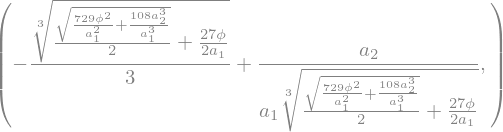

In [8]:
def gamma(x):
    return gamma1 * x + gamma2

def f1(x):
    return a1 * (x ** 3) + a2 * x + phi

def f2(x, y, z):
    return b1 * z + b2 * (gamma(x) - (y**2 + z**2)) * y

def f3(x, y, z):
    return c1 * y + c2 * (gamma(x) - (y**2 + z**2)) * z

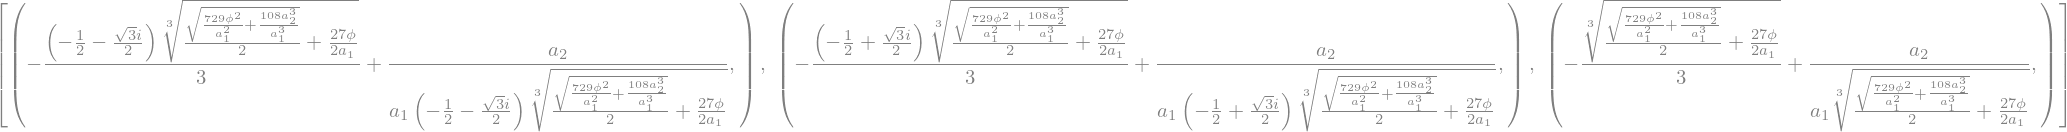

In [8]:
p1 = a1 * (x ** 3) + a2 * x + phi 
solve_poly_system([p1], x)

In [4]:
M = Matrix([f1(x), f2(x, y, z), f3(x, y, z)])

On commence par calculer les points d'équilibre de notre système.

In [ ]:
fixed_points = solve(M, [x, y, z])[2]
fixed_points

On calcule la matrice jacobienne de notre système au point d'équilibre. Celle-ci constitue une description de système linéarisé au voisinage du point d'équilibre.

In [ ]:
M.jacobian([x, y, z])

In [ ]:
Jac = M.jacobian([x,y,z]).subs({x: fixed_points[0], y: fixed_points[1], z: fixed_points[2]})
Jac

On peut calculer son polynôme caractéristique et trouver ses valeurs propres. Celles-ci nous renseigne sur la nature du point d'équilibre. 

In [ ]:
Jac.charpoly()

In [ ]:
Jac.eigenvals()

In [ ]:
result = lambdify([a1, a2, b1, b2, c1, c2], J)